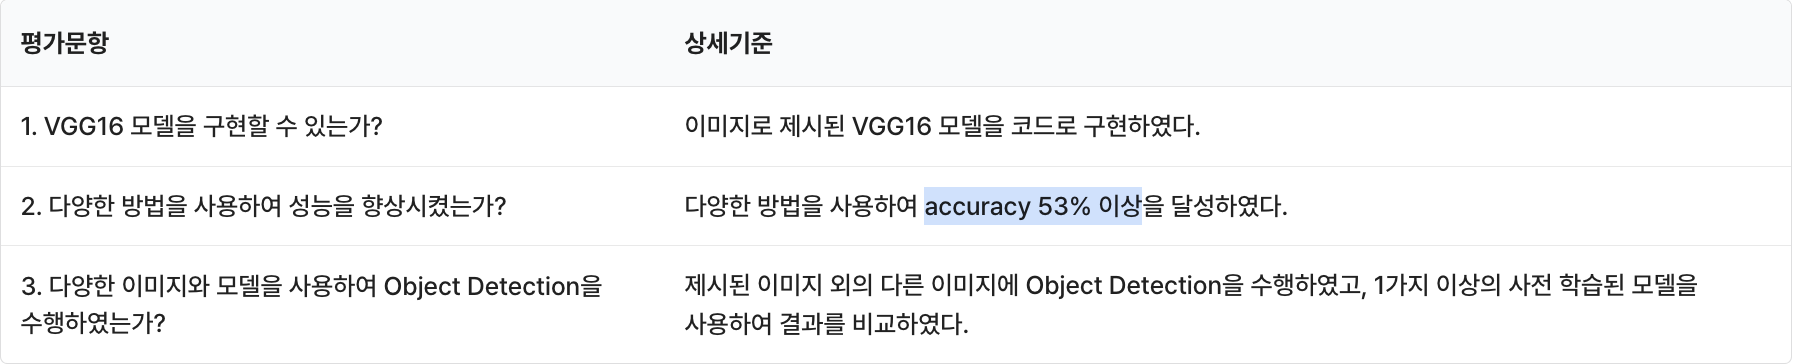

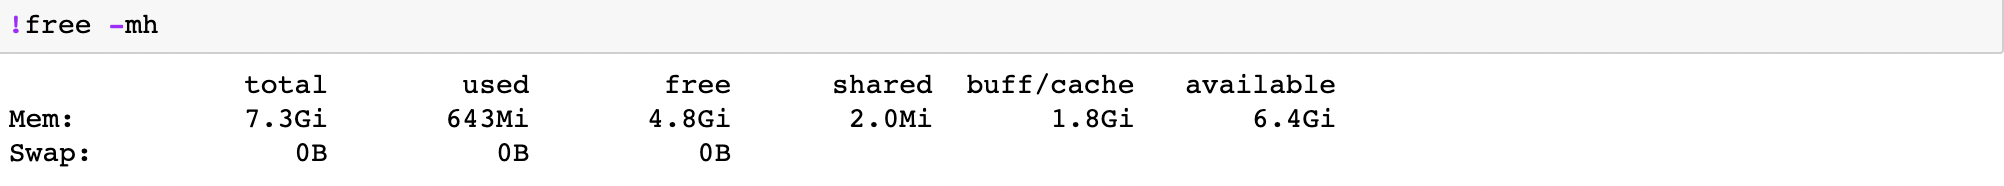

# import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid")

### https://www.kaggle.com/c/dogs-vs-cats/data  
In short, if you cheat by hand labeling your predictions, expect to do it all over again, possibly many times.

`tf.keras.utils.get_file`  
(
    __fname=None,
    origin=None__,
    untar=False,
    md5_hash=None,
    file_hash=None,
    cache_subdir='datasets',
    hash_algorithm='auto',
    __extract=False__,
    archive_format='auto',
    cache_dir=None,
)

Downloads a file from a URL if it not already in the cache.  

`fname`  
Name of the file. If an absolute path `/path/to/file.txt` is
        specified the file will be saved at that location. If `None`, the
        name of the file at `origin` will be used.  
`origin`  
Original URL of the file.  
`extract`  
True tries extracting the file as an Archive, like tar or zip.

--------
`os.path.join`(a, *p)

Join two or more pathname components, inserting '/' as needed.
If any component is an absolute path, all previous path components
will be discarded.  An empty last part will result in a path that
ends with a separator.

---------
`os.path.dirname(p)`  
 Returns the directory component of a pathname

In [2]:
# 바로 다운로드 되어버리넹 오오옷!
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 0s 0us/step


In [3]:
_URL

'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [4]:
path_to_zip

'/aiffel/.keras/datasets/cats_and_dogs.zip'

In [5]:
path

'/aiffel/.keras/datasets/cats_and_dogs_filtered'

In [6]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [7]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)
 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


`os.listdir`  
(path=None)

Return a list containing the names of the files in the directory.

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


a = np.array([[1,2], [3,4]])  
a.flatten("C")  
> C : array([1, 2, 3, 4])  
> F : array([1, 3, 2, 4])  
> A : array([1, 2, 3, 4])  
> K : array([1, 2, 3, 4])  

parameter Initialization  
`keras.models.Sequential().add()`  
`image_gen_train.flow_from_directory`

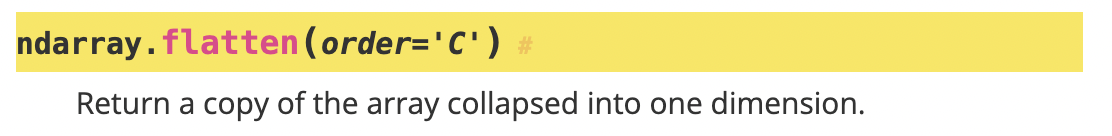  
order{‘C’, ‘F’, ‘A’, ‘K’}, optional
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html#numpy.ndarray.flatten

In [9]:
# input_shape
batch_size = 24 # 8
epochs = 10 # 10
IMG_HEIGHT = 256 # 256
IMG_WIDTH = 256 # 256

`plt.tight_layout`  
(*, pad=1.08, h_pad=None, w_pad=None, rect=None)

Adjust the padding between and around subplots.

In [10]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

train 데이터가 2천장 밖에 되지 않기 때문에 Data Augmentation(데이터 증강)을 통해 데이터의 수를 늘립니다.

`ImageDataGenerator`  
(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    __rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0__,
    brightness_range=None,
    shear_range=0.0,
    __zoom_range=0.0__,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    __horizontal_flip=False,
    vertical_flip=False,
    rescale=None__,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
     
Generate batches of tensor image data with real-time data augmentation.

In [11]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale= 1./255,
                                     rotation_range= 0.5, #20
                                     width_shift_range= .2, # .2
                                     height_shift_range= .2, # .2
                                     shear_range= 0.1,
                                     zoom_range= 0.3,
                                     horizontal_flip= True, 
                                     vertical_flip= False,
                                     fill_mode='nearest')

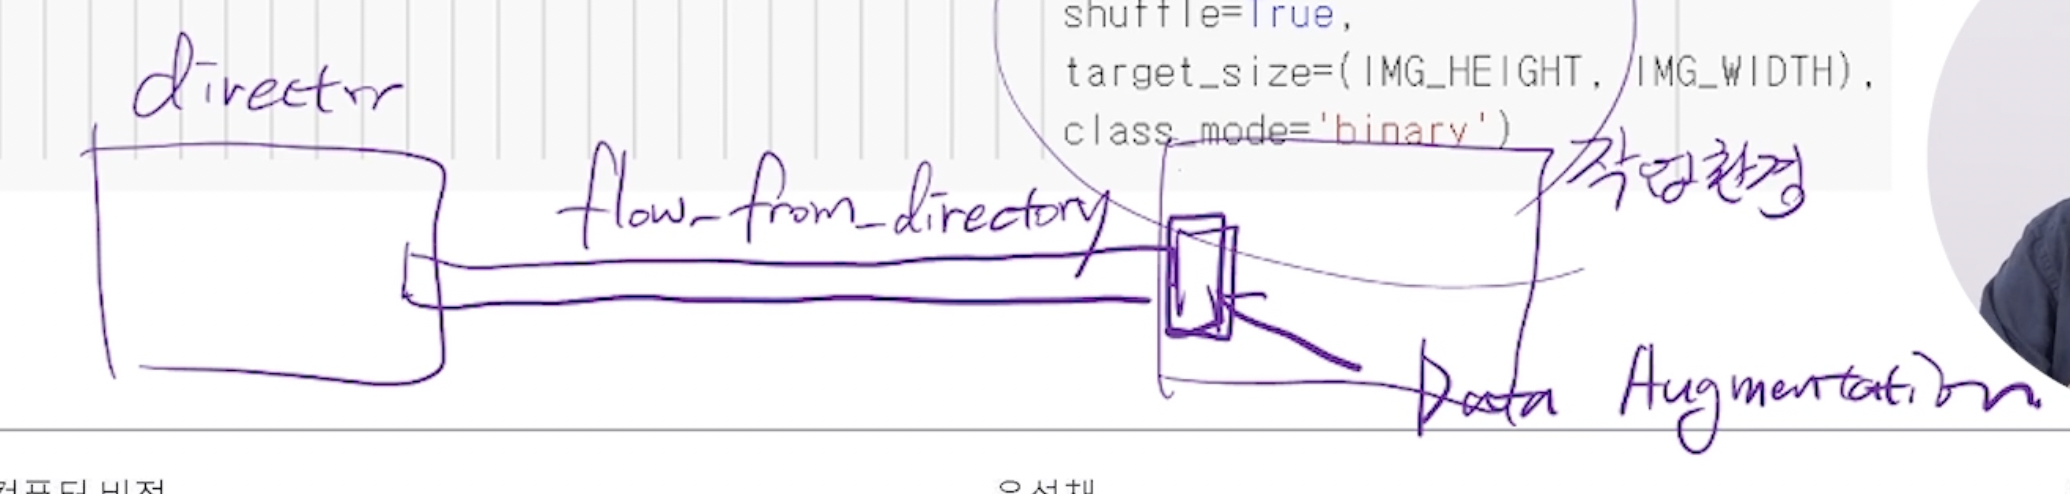
.flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결시켜 줍니다.

`image_gen_train.flow_from_directory`(
    __directory,
    target_size=(256, 256)__,
    color_mode='rgb',
    classes=None,
    __class_mode='categorical',
    batch_size=32,
    shuffle=True__,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
)

In [12]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
#Found 2000

Found 2000 images belonging to 2 classes.


In [13]:
train_data_gen[0][0].shape

# [[[[0.5764706 , 0.5411765 , 0.47450984],
#          [0.5764706 , 0.5411765 , 0.47450984],
#          [0.5764706 , 0.5411765 , 0.47450984],

(24, 256, 256, 3)

In [14]:
train_data_gen

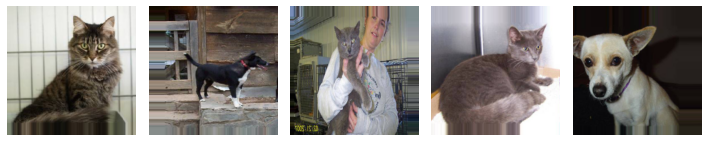

In [15]:
plotImages(train_data_gen[0][0])

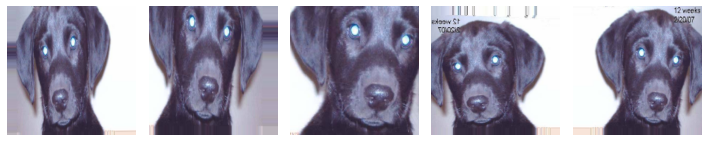

In [16]:
plotImages([train_data_gen[1][0][0] for i in range(5)])

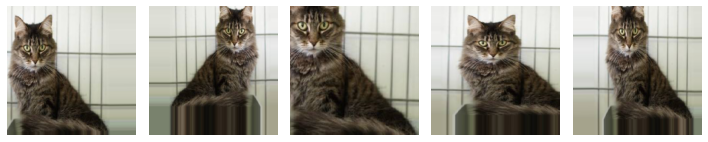

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Validation 데이터에도 train 데이터와 같은 동일한 작업을 해 줍니다.  
그러나 Validation 데이터는 classification이 잘 되는지 평가하는 용도로 사용되기 때문에 데이터의 스케일만 변경

-----
### Training data generator
`image_gen_train = ImageDataGenerator`(rescale= 1./255,
                                     rotation_range= 20,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True, 
                                     vertical_flip= False,
                                     fill_mode='nearest')

In [18]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [19]:
val_data_gen = image_gen_val.flow_from_directory(batch_size= batch_size,
                                                 directory= validation_dir,
                                                 target_size= (IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')
#Found 1000
#개와 고양이를 분류하는 task를 수행하기 때문에 class_mode는 'binary'

Found 1000 images belonging to 2 classes.


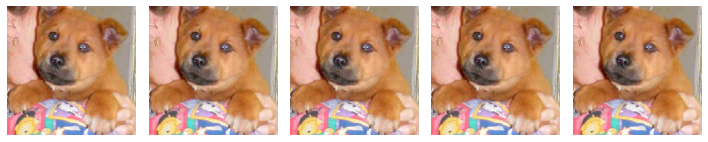

In [20]:
plotImages([val_data_gen[1][0][0] for i in range(5)])

Validation 데이터를 확인  
크게 이미지와 정답 데이터로 구성이 되어 있습니다.

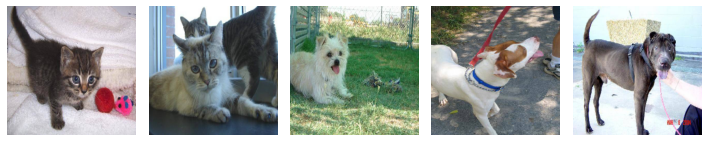

In [21]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [22]:
_[:5]

array([0., 0., 1., 1., 1.], dtype=float32)

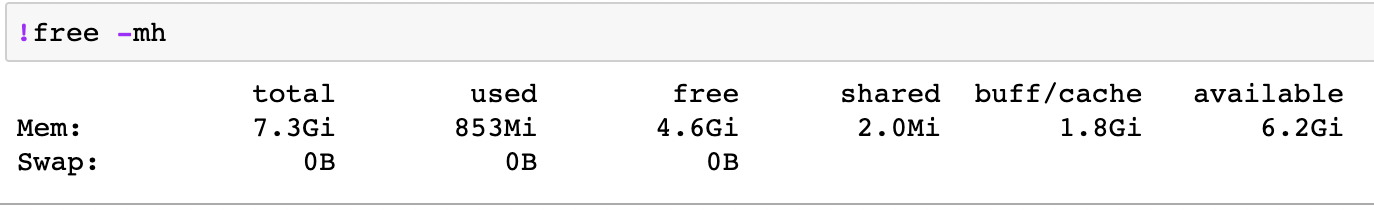

# 1-1. VGG16 모델 구현하기 

tf.keras.layers.
>Conv2D  
BatchNormalization  
MaxPool2D  
Dropout  

https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [23]:
input_layer=tf.keras.layers.Input(shape=(256, 256, 3)) # 256, 256, 3
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.5)(x) # .25
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)

out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584

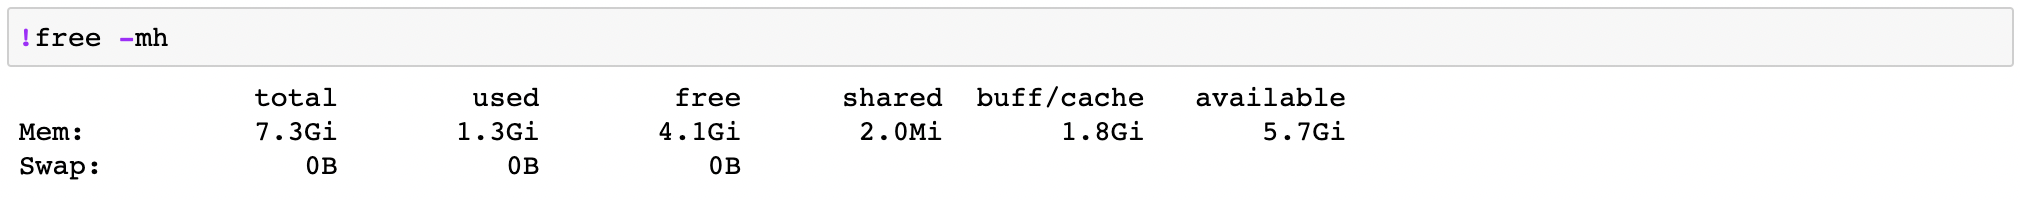

tf.keras.losses.  
https://www.tensorflow.org/api_docs/python/tf/keras/losses
>binary_crossentropy  

  
tf.keras.optimizers  
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
>Adam  


tf.keras.metrics  
https://www.tensorflow.org/api_docs/python/tf/keras/metrics
>binary_accuracy  

In [27]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy

model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

`tf.keras.callbacks.TensorBoard`  
(
    __log_dir='logs',
    histogram_freq=0__,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,
    **kwargs,
)
     
Enable visualizations for TensorBoard.

In [25]:
#callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다.
batch가 끝없이 생성되기 때문에, 한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다.  
만약 batch_size=20이고 steps_per_epoch=100일 경우 (데이터, 라벨)의 쌍 20개가 생성되고, 크기가 20인 batch 데이터를 100번 학습하면 1 epoch이 완료됩니다.  
단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다

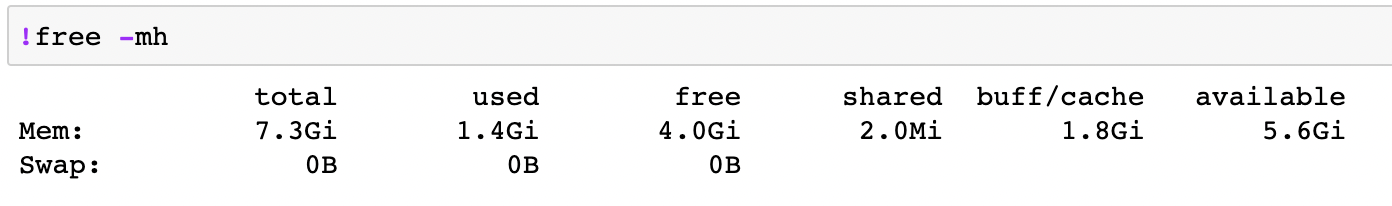

In [26]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) / batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      #callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/10
83/83 [==============================] - 91s 608ms/step - loss: 1.1254 - binary_accuracy: 0.5530 - val_loss: 0.9246 - val_binary_accuracy: 0.5000
Epoch 2/10
83/83 [==============================] - 46s 547ms/step - loss: 0.7282 - binary_accuracy: 0.5780 - val_loss: 0.8903 - val_binary_accuracy: 0.5000
Epoch 3/10
83/83 [==============================] - 47s 558ms/step - loss: 0.6724 - binary_accuracy: 0.6205 - val_loss: 0.8767 - val_binary_accuracy: 0.5000
Epoch 4/10
83/83 [==============================] - 47s 557ms/step - loss: 0.6782 - binary_accuracy: 0.6280 - val_loss: 0.8393 - val_binary_accuracy: 0.5000
Epoch 5/10
83/83 [==============================] - 47s 557ms/step - loss: 0.6427 - binary_accuracy: 0.6695 - val_loss: 0.7782 - val_binary_accuracy: 0.4990
Epoch 6/10
83/83 [==============================] - 47s 560ms/step - loss: 0.6609 - binary_accuracy: 0.6450 - val_loss: 1.2655 - val_binary_accuracy: 0.5070
Epoch 7/10
83/83 [==============================] - 47s 55

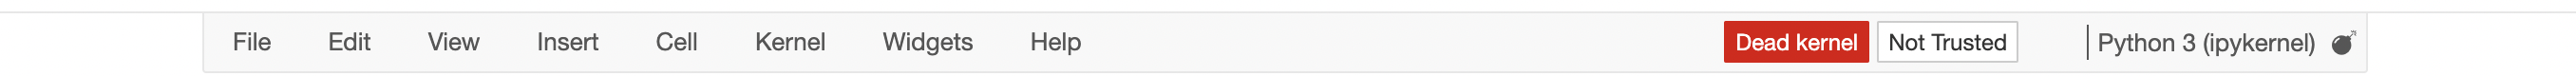 
이 부분에서만 2시간 째...  

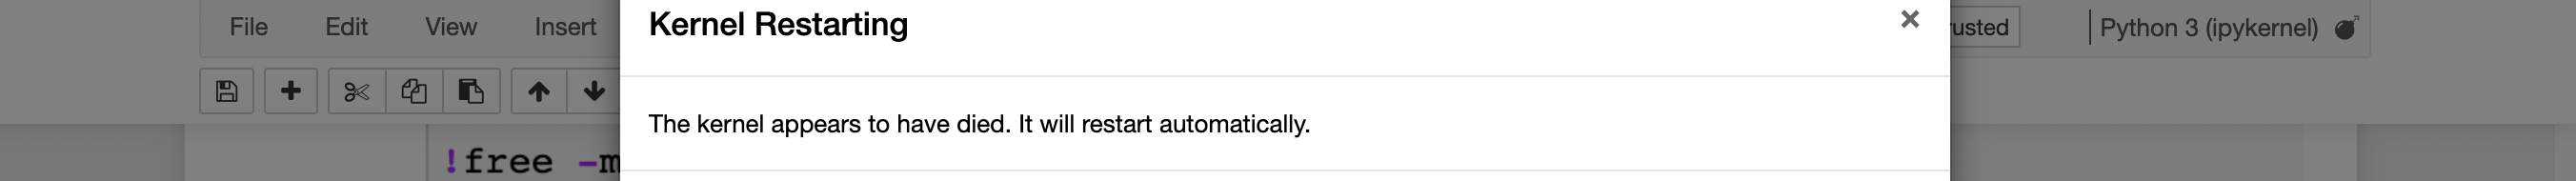
코드내에 불필요한 메모리 삭제  
https://min23th.tistory.com/11

InvalidArgumentError:  Input to reshape is a tensor with 1304576 values, but the requested shape requires a multiple of 131072

----
Input to reshape is a tensor with 1204224 values, but the requested shape requires a multiple of 131072

----
Input to reshape is a tensor with 802816 values, but the requested shape requires a multiple of 131072

----
Input to reshape is a tensor with 1605632 values, but the requested shape requires a multiple of 131072

-----
InvalidArgumentError:  Input to reshape is a tensor with 3211264 values, but the requested shape requires a multiple of 131072

----
Function call stack  
train_function  
https://park-duck.tistory.com/entry/Python-Tensorflow-Function-call-stack-trainfunction-error-%ED%95%B4%EA%B2%B0  
batch_size 를 줄이면 된다. 

IMG_HEIGHT = 256  
IMG_WIDTH = 256

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))

-----

이렇게 연관 되어있어서 shape의 문제가 생긴 듯..

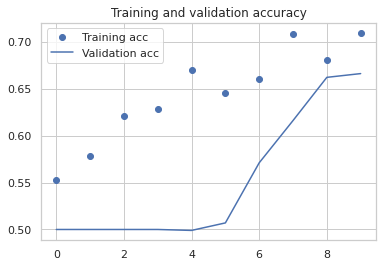

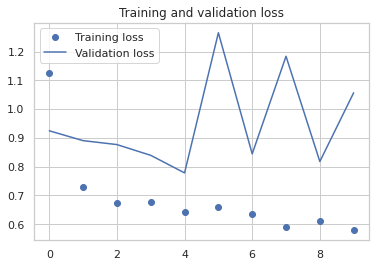

In [28]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()